# ADAM RAFM PROJECT

For this capstone project we will be analyzing some client data. The data contains the following fields:

* instruct_hdr_fid :The financial transaction ID.
* end_hdr_tim: The end date and time of the transaction,
* start_hdr_time: The start date and time of the transaction.
* from_location_cell:CGI to see what location is from
* to_location_cell: CGI where receiving location is 
* instruct_hdr_type: String variable, The transaction type 
* instruct_from_amount: String variable, Township
* instruct_from_fro_msisdn: Sender number
* instruct_to_fro_msisdn: Receiver number
* tbl_dt: Date of transactions, YYYYMMDD

## Data and Setup

** Import numpy and pandas,data viz tools **

In [25]:
import numpy as pd
import pandas as pd 
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns
sns.set_style('whitegrid')

** Read in the fin_log csv file as a dataframe called fin_log **

In [2]:
cell_loc=pd.read_csv('Adam_RAFM_Tables_cell_location_detail_202207280810.csv')

In [3]:
fin_log=pd.read_csv('Adam_RAFM_Tables_fin_log_202207291415.csv')

In [4]:
fin_log.head()

,instruct_hdr_fid,end_hdr_time,start_hdr_time,from_location_cell,to_location_cell,instruct_hdr_type,instruct_from_amount,instruct_from_fro_msisdn,instruct_to_fro_msisdn,tbl_dt
0,18002805203,2022-06-29T08:06:26.614+0000,2022-06-29T08:06:00.538+0000,NaN,62001-424-47273,COMMISSIONING,0.60,633457081244AFEC,5F9074641462023F,20220629
1,18004881229,2022-06-29T10:29:06.299+0000,2022-06-29T10:28:52.892+0000,NaN,NaN,COMMISSIONING,0.20,633457081244AFEC,93E077C4014E41C3,20220629
2,18009118505,2022-06-29T15:29:23.974+0000,2022-06-29T15:27:39.585+0000,NaN,62001-121-32124,COMMISSIONING,0.20,633457081244AFEC,4CF2A108C938B456,20220629
3,18011026743,2022-06-29T17:21:44.190+0000,2022-06-29T17:20:47.056+0000,NaN,NaN,COMMISSIONING,0.20,633457081244AFEC,1106C2074C655319,20220629
4,18009325348,2022-06-29T15:41:24.066+0000,2022-06-29T15:41:02.118+0000,NaN,NaN,COMMISSIONING,0.36,633457081244AFEC,E40CD0316C720DA4,20220629


In [23]:
fin_log.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype              
---  ------                    --------------  -----              
 0   instruct_hdr_fid          50000 non-null  int64              
 1   end_hdr_time              50000 non-null  datetime64[ns, UTC]
 2   start_hdr_time            50000 non-null  datetime64[ns, UTC]
 3   from_location_cell        7663 non-null   object             
 4   to_location_cell          5064 non-null   object             
 5   instruct_hdr_type         50000 non-null  object             
 6   instruct_from_amount      50000 non-null  float64            
 7   instruct_from_fro_msisdn  50000 non-null  object             
 8   instruct_to_fro_msisdn    50000 non-null  object             
 9   tbl_dt                    50000 non-null  int64              
 10  transaction_length        50000 non-null  timedelta64[ns]    
dtypes: datetime64[n

## Data cleaning

**MISSING DATA**

We can use seaborn to create a simple heatmap to see where we are missing data!

<AxesSubplot:>

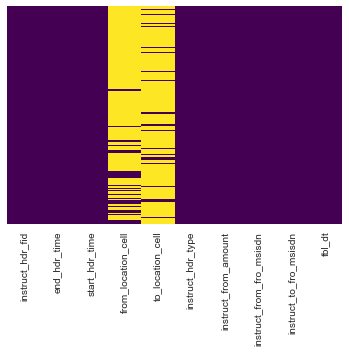

In [5]:
sns.heatmap(fin_log.isnull(),yticklabels=False,cbar=False,cmap='viridis')

As we can see there are a lot of missing values in the from_location_cell and to_location_cell columns . We are going to follow our given instructions to ignore this and go on with the EDA, so we are not dropping these columns from the dataframe.

**FEATURE ENGINEERING**

** Convert both end_time and start_time columns to datetime **

In [7]:
fin_log['end_hdr_time'] = pd.to_datetime(fin_log['end_hdr_time'])
fin_log['start_hdr_time'] = pd.to_datetime(fin_log['start_hdr_time'])

** Convert tbl_dt column to date type **

In [8]:
fin_log['tbl_dt'] = pd.to_datetime(fin_log['tbl_dt'],yearfirst=True,format='%Y%m%d')

** Create new column- transaction_length, to check how long each transaction was **

In [9]:
fin_log['transaction_length'] = fin_log['end_hdr_time']-fin_log['start_hdr_time']

 ** Create a new column (transaction_length_seconds) showing the transaction length in seconds, datatype=float **

In [10]:
from datetime import datetime

In [11]:
fin_log['transaction_length_seconds'] = fin_log['transaction_length'].dt.total_seconds()

In [12]:
fin_log.head()

,instruct_hdr_fid,end_hdr_time,start_hdr_time,from_location_cell,to_location_cell,instruct_hdr_type,instruct_from_amount,instruct_from_fro_msisdn,instruct_to_fro_msisdn,tbl_dt,transaction_length,transaction_length_seconds
0,18002805203,2022-06-29 08:06:26.614000+00:00,2022-06-29 08:06:00.538000+00:00,NaN,62001-424-47273,COMMISSIONING,0.60,633457081244AFEC,5F9074641462023F,2022-06-29,0 days 00:00:26.076000,26.076
1,18004881229,2022-06-29 10:29:06.299000+00:00,2022-06-29 10:28:52.892000+00:00,NaN,NaN,COMMISSIONING,0.20,633457081244AFEC,93E077C4014E41C3,2022-06-29,0 days 00:00:13.407000,13.407
2,18009118505,2022-06-29 15:29:23.974000+00:00,2022-06-29 15:27:39.585000+00:00,NaN,62001-121-32124,COMMISSIONING,0.20,633457081244AFEC,4CF2A108C938B456,2022-06-29,0 days 00:01:44.389000,104.389
3,18011026743,2022-06-29 17:21:44.190000+00:00,2022-06-29 17:20:47.056000+00:00,NaN,NaN,COMMISSIONING,0.20,633457081244AFEC,1106C2074C655319,2022-06-29,0 days 00:00:57.134000,57.134
4,18009325348,2022-06-29 15:41:24.066000+00:00,2022-06-29 15:41:02.118000+00:00,NaN,NaN,COMMISSIONING,0.36,633457081244AFEC,E40CD0316C720DA4,2022-06-29,0 days 00:00:21.948000,21.948


## EDA

Now that the data is cleaned , lets explore demographic features 

** What is the most common transaction type? **

In [40]:
fin_log['instruct_hdr_type'].value_counts()

COMMISSIONING                  39249
DEBIT                           4447
PAYMENT                         3720
TRANSFER                        1324
CASH_OUT                         556
CASH_IN                          492
ADJUSTMENT                       110
PAYMENT_SEND                      71
TRANSACTION_HISTORY_ENQUIRY       22
EXTERNAL_TRANSFER                  3
BATCH_TRANSFER                     3
TRANSFER_TO_VOUCHER                2
TRANSFER_FROM_VOUCHER              1
Name: instruct_hdr_type, dtype: int64

** Now use seaborn to create a countplot of transaction by types. **

Text(0.5, 1.0, 'Transaction types')

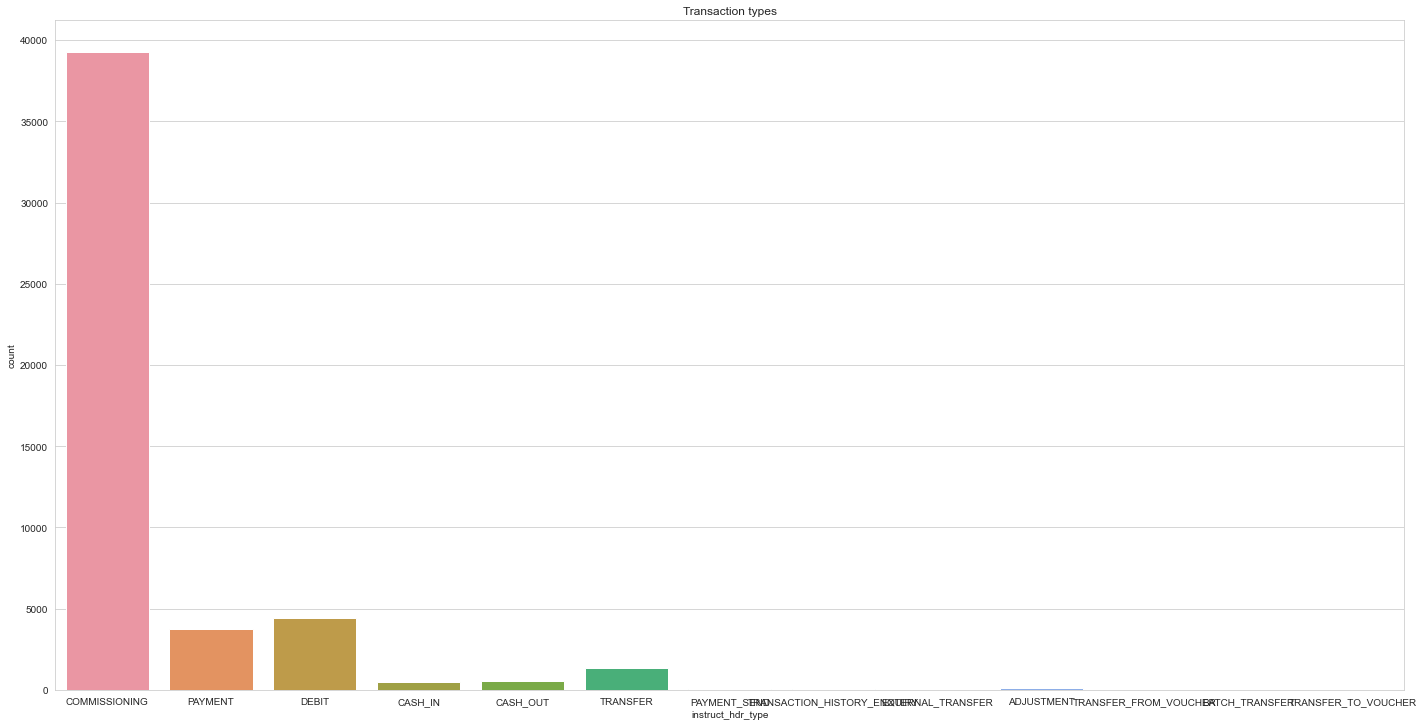

In [49]:
plt.figure(figsize=(20, 10))
sns.countplot(x='instruct_hdr_type',data=fin_log)
plt.tight_layout()
plt.title('Transaction types')

Most transactions are completed through Commissioning, lets explore why.

** What is the mean transaction length for all transactions and what is the mean transaction lenght for Comissioning **

In [78]:
# Mean for all transactions
Transactions_len_mean = fin_log['transaction_length'].mean()

print('Transaction_length mean:',Transactions_len_mean)

q1=fin_log['transaction_length'].quantile(0.25)
q3=fin_log['transaction_length'].quantile(0.75)
iqr=q3-q1
lower_limit=q1-(1.5*iqr)
upper_limit=q3+(1.5*iqr)
print('Quarter 1:',q1)
print('Quarter 3:',q3)
print('IQR:',iqr)
print('lower_limit:',lower_limit)
print('upper_limit:',upper_limit)

Transaction_length mean: 0 days 00:00:28.780577620
Quarter 1: 0 days 00:00:14.836000
Quarter 3: 0 days 00:00:24.966250
IQR: 0 days 00:00:10.130250
lower_limit: -1 days +23:59:59.640625
upper_limit: 0 days 00:00:40.161625


** group data frame and show the average transaction length for each transaction type **

instruct_hdr_type
ADJUSTMENT                       0 days 00:28:16.748800
BATCH_TRANSFER                   0 days 00:00:53.893000
CASH_IN                       0 days 00:00:10.322691056
CASH_OUT                      0 days 00:00:27.244178057
COMMISSIONING                 0 days 00:00:28.641242706
DEBIT                         0 days 00:00:14.509490218
EXTERNAL_TRANSFER                0 days 00:30:22.571000
PAYMENT                       0 days 00:00:08.110670161
PAYMENT_SEND                  0 days 00:00:00.128014084
TRANSACTION_HISTORY_ENQUIRY   0 days 00:00:09.237045454
TRANSFER                      0 days 00:00:05.624086102
TRANSFER_FROM_VOUCHER            0 days 00:00:04.084000
TRANSFER_TO_VOUCHER              0 days 00:00:16.192500
Name: transaction_length, dtype: timedelta64[ns]

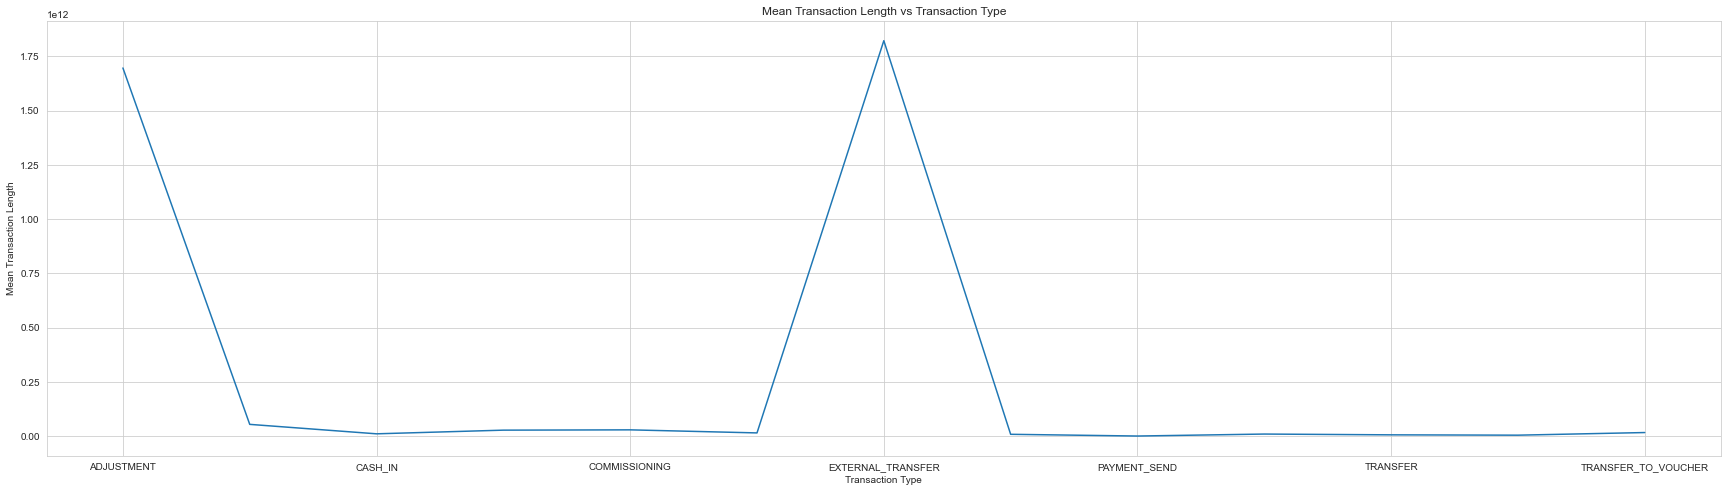

In [22]:
grouped_data=fin_log.groupby('instruct_hdr_type')
grouped_data['transaction_length'].mean().plot()
plt.title("Mean Transaction Length vs Transaction Type")
plt.xlabel("Transaction Type")
plt.ylabel("Mean Transaction Length")
plt.rcParams["figure.figsize"] = (20,8)

grouped_data=fin_log.groupby('instruct_hdr_type')
grouped_data['transaction_length'].mean()

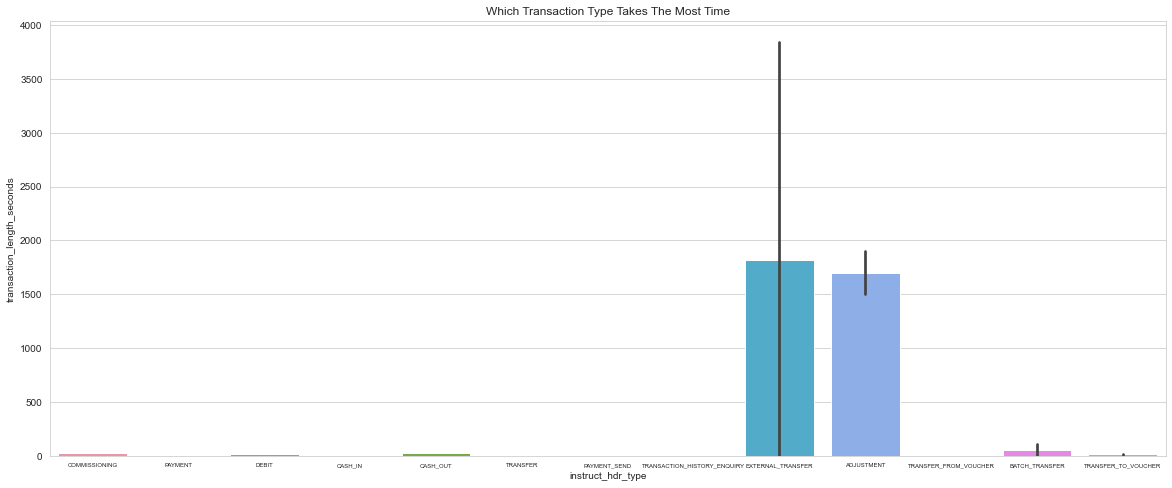

In [23]:
plt.figure(figsize=(20, 8))
plt.tight_layout()
plt.title('Which Transaction Type Takes The Most Time')
sns.barplot(x='instruct_hdr_type',y='transaction_length_seconds',data=fin_log)
#set parameters for tick labels
plt.tick_params(axis='x', which='major', labelsize=6)

**As expected External_Transfers and Adjustments seem to take up the most time, with Batch_Transfer's at third place.**

Later on we can check if transaction length has anything to do with whether or not an agennt commits fraud or not .

** what is the relationship between transaction length and amount transferred? **

Text(0.5, 1.0, 'Amount Sent VS Transaction Length')

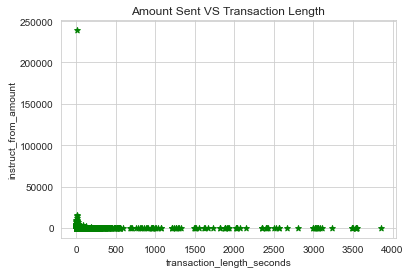

In [26]:
plt.scatter(x='transaction_length_seconds',y='instruct_from_amount',color='green',marker='*',data=fin_log)
plt.xlabel('transaction_length_seconds')
# frequency label
plt.ylabel('instruct_from_amount')
# plot title
plt.title('Amount Sent VS Transaction Length')

** The axes intervals of the graph aren't tailored to the dataframes values. Let's change this **

In [31]:
print('maximum amount of transaction_length_seconds is :',fin_log['transaction_length_seconds'].max())
print('minimum amount of transaction_length_seconds is :',fin_log['transaction_length_seconds'].min())
print('\n')
print('maximum amount of instruct_from_amount is :',fin_log['instruct_from_amount'].max())
print('minimum amount of instruct_from_amount is :',fin_log['instruct_from_amount'].min())

maximum amount of transaction_length_seconds is : 3847.3210000000004
minimum amount of transaction_length_seconds is : 0.060000000000000005


maximum amount of instruct_from_amount is : 239000.0
minimum amount of instruct_from_amount is : 0.0


**Drop outlier where instruct_from_amount=239000.0**

In [38]:
fin_log.drop(fin_log[fin_log['instruct_from_amount']==239000.0].index, inplace=True)

In [44]:
print('maximum amount of transaction_length_seconds is :',fin_log['transaction_length_seconds'].max())
print('minimum amount of transaction_length_seconds is :',fin_log['transaction_length_seconds'].min())
print('\n')
print('maximum amount of instruct_from_amount is :',fin_log['instruct_from_amount'].max())
print('minimum amount of instruct_from_amount is :',fin_log['instruct_from_amount'].min())
print('mean amount of instruct_from_amount is :',fin_log['instruct_from_amount'].median())

maximum amount of transaction_length_seconds is : 3847.3210000000004
minimum amount of transaction_length_seconds is : 0.060000000000000005


maximum amount of instruct_from_amount is : 15600.0
minimum amount of instruct_from_amount is : 0.0
mean amount of instruct_from_amount is : 0.4


(0.0, 0.4)

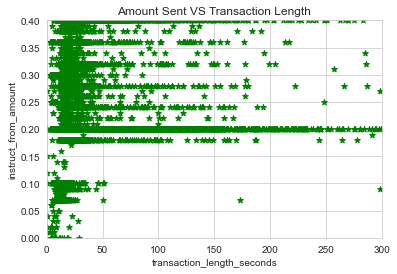

In [55]:
plt.scatter(x='transaction_length_seconds',y='instruct_from_amount',color='green',marker='*',data=fin_log)
plt.xlabel('transaction_length_seconds')
# frequency label
plt.ylabel('instruct_from_amount')
# plot title
plt.title('Amount Sent VS Transaction Length')
# Set x-axis range
plt.xlim(0,300)
# Set y-axis range
plt.ylim(0,0.4)

** The plot suggests that there is no relationship between transaction length and amount transferred **


**Which Transaction type makes the most money**

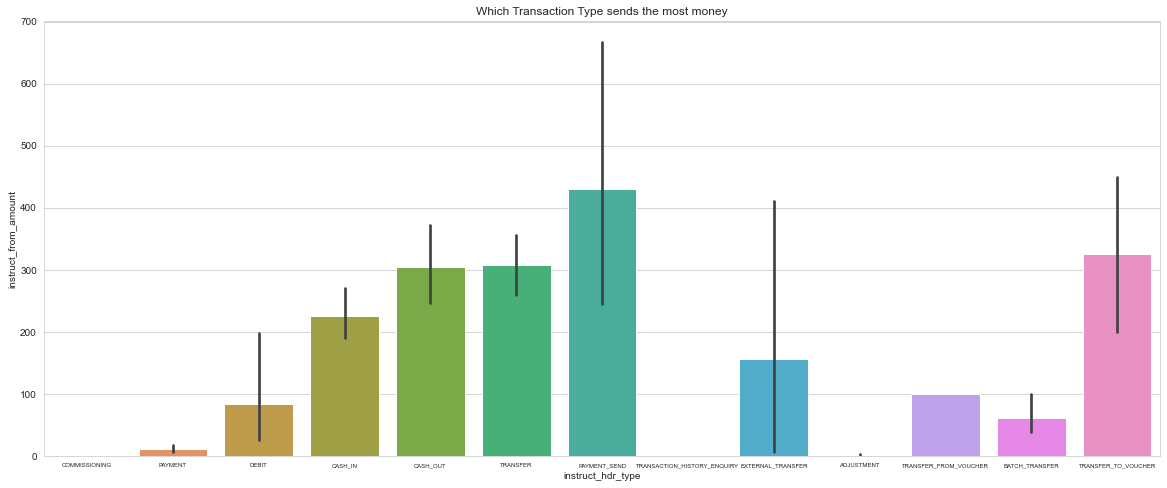

In [24]:
plt.figure(figsize=(20, 8))
plt.tight_layout()
plt.title('Which Transaction Type sends the most money')
sns.barplot(x='instruct_hdr_type',y='instruct_from_amount',data=fin_log)
#set parameters for tick labels
plt.tick_params(axis='x', which='major', labelsize=6)

Payment_send, cash_out,transfers and transfer_to_voucher seem to pool in the most money. Maybe External Transfers and Adjustments aren't used to send much money because they take the most time to complete as shown in the 'Which Transaction Type Takes The Most Time' graph

**We want to Analyse amount sent by each customer by hour,month and day of the week** 

** You can now grab specific attributes from a Datetime object by calling them. For example:**

    time = df['timeStamp'].iloc[0]
    time.hour

**You can use Jupyter's tab method to explore the various attributes you can call. Now that the timestamp column are actually DateTime objects, use .apply() to create 3 new columns called Hour, Month, and Day of Week. You will create these columns based off of the timeStamp column, reference the solutions if you get stuck on this step.**


In [42]:
fin_log['Hour'] = fin_log['start_hdr_time'].apply(lambda time: time.hour)
fin_log['Month'] = fin_log['start_hdr_time'].apply(lambda time: time.month)
fin_log['Day of Week'] = fin_log['start_hdr_time'].apply(lambda time: time.dayofweek)
fin_log['Year'] = fin_log['start_hdr_time'].apply(lambda time: time.year)

In [38]:
fin_log.head()

,instruct_hdr_fid,end_hdr_time,start_hdr_time,from_location_cell,to_location_cell,instruct_hdr_type,instruct_from_amount,instruct_from_fro_msisdn,instruct_to_fro_msisdn,tbl_dt,transaction_length,transaction_length_seconds,Hour,Month,Day of Week
0,18002805203,2022-06-29 08:06:26.614000+00:00,2022-06-29 08:06:00.538000+00:00,NaN,62001-424-47273,COMMISSIONING,0.60,633457081244AFEC,5F9074641462023F,2022-06-29,0 days 00:00:26.076000,26.076,8,6,2
1,18004881229,2022-06-29 10:29:06.299000+00:00,2022-06-29 10:28:52.892000+00:00,NaN,NaN,COMMISSIONING,0.20,633457081244AFEC,93E077C4014E41C3,2022-06-29,0 days 00:00:13.407000,13.407,10,6,2
2,18009118505,2022-06-29 15:29:23.974000+00:00,2022-06-29 15:27:39.585000+00:00,NaN,62001-121-32124,COMMISSIONING,0.20,633457081244AFEC,4CF2A108C938B456,2022-06-29,0 days 00:01:44.389000,104.389,15,6,2
3,18011026743,2022-06-29 17:21:44.190000+00:00,2022-06-29 17:20:47.056000+00:00,NaN,NaN,COMMISSIONING,0.20,633457081244AFEC,1106C2074C655319,2022-06-29,0 days 00:00:57.134000,57.134,17,6,2
4,18009325348,2022-06-29 15:41:24.066000+00:00,2022-06-29 15:41:02.118000+00:00,NaN,NaN,COMMISSIONING,0.36,633457081244AFEC,E40CD0316C720DA4,2022-06-29,0 days 00:00:21.948000,21.948,15,6,2


** Notice how the Day of Week is an integer 0-6. Use the .map() with this dictionary to map the actual string names to the day of the week: **

    dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}

In [51]:
dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}
fin_log['Day of Week'] = fin_log['Day of Week'].map(dmap)

Text(0.5, 1.0, 'Total Amount transferred vs Date')

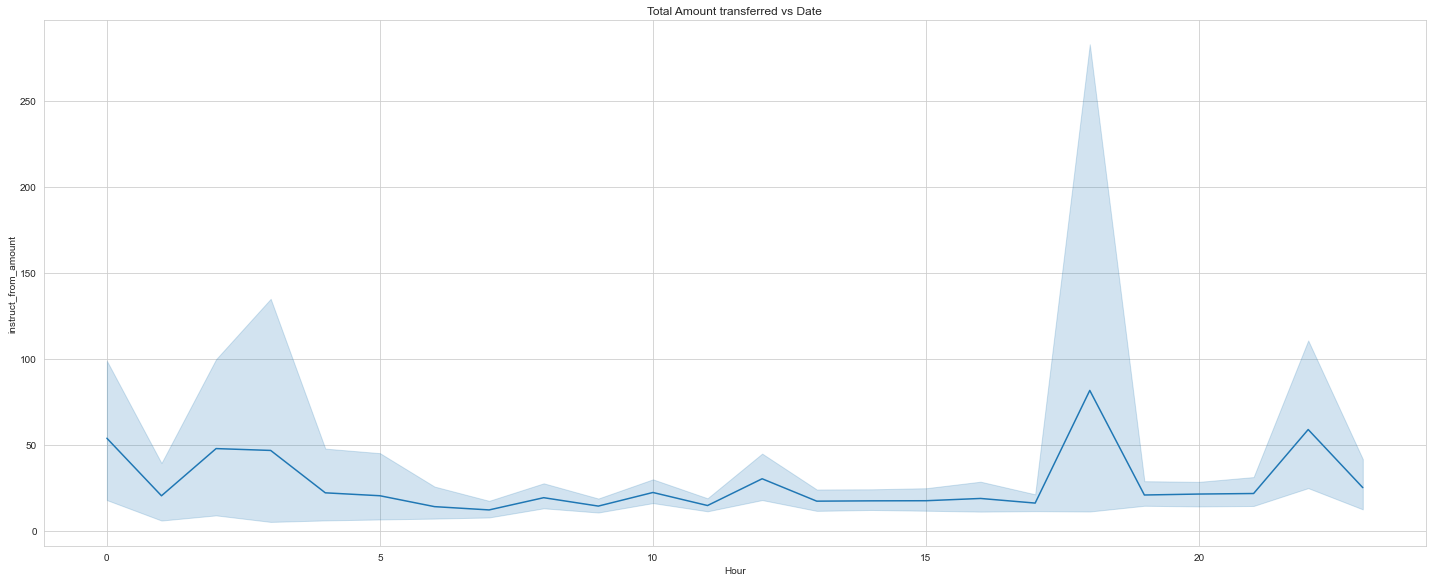

In [66]:
sns.lineplot(x='Hour',y='instruct_from_amount',data=fin_log)
plt.tight_layout()
plt.title('Total Amount transferred vs Date')

In [82]:
import plotly.express as px
fig = px.line(fin_log, x='Hour', y='instruct_from_amount',
                facet_col='instruct_hdr_type', facet_col_wrap=4,width=1000,height=1500)
fig.show()

# Hourly Analysis

The 'Total Amount transferred vs Date' Graph shows that high value transactions are being made most around 12AM,7PM, and 11PM. Further Analysis would be required to see why this is the case. 

**Why is instruct_from_amount relatively low in the hours of 5AM-4PM?**

Perhaps this is because most of the client's customers use Transaction_types like Commissioning and Debits-these are normally used for smaller transactions compared to a Transfer,External Transfer or Cash out.